In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import time
import os
import requests 

import pandas as pd
from pandas import DataFrame, read_csv
import scipy as sc
import numpy as np

import seaborn as sns

import re

from sklearn.preprocessing import scale

from sklearn import preprocessing
from sklearn.cluster import KMeans

import statsmodels.formula.api as sm

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (16, 16) 

pd.set_option('display.max_columns', None)

In [2]:
careerTotalDB = pd.read_csv('Data/CSV Files/Database/careerAVGPlayer.csv')
del careerTotalDB['Colleges']
del careerTotalDB['Pos']
del careerTotalDB['Birth Date']

In [3]:
colsToScale = ['Years', 'From', 'To', 'Ht(cm)', 'Wt(kg)',
       'MVP', 'Finals MVP', 'All-Star MVP', 'Most Improved', 'Sixth Man',
       'Defence Player', 'Rookie', 'All 1st', 'All 2nd', 'All 3rd', 'All Tot',
       'All-Star', 'D Tot', 'D 1st', 'D 2nd', 'Total Awards', 'Years.1', 'G',
       'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'PIR']

In [4]:
careerTotalDB.shape

(2789, 50)

In [5]:
for x in range(0, len(colsToScale)):
    careerTotalDB[colsToScale[x]] = scale(careerTotalDB[colsToScale[x]])

C:\Users\Moshe Gotam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [6]:
careerTotalDB

,ID,Player,Years,From,To,Ht(cm),Wt(kg),MVP,Finals MVP,All-Star MVP,Most Improved,Sixth Man,Defence Player,Rookie,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards,Years.1,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR
0,greenac01,A.C. Green,2.287703,-1.305028,-0.430639,0.589137,0.143676,-0.066252,-0.063798,-0.078434,-0.104422,-0.088347,-0.069642,-0.117529,-0.098047,-0.145368,-0.169225,-0.159109,0.485762,1.047120,-0.110565,2.348053,0.375103,2.287703,3.184616,3.058138,1.432119,0.679697,0.510871,0.643064,-0.530145,-0.517832,0.214019,0.927115,0.829941,0.508531,0.409188,1.326116,1.399501,0.324636,2.678543,1.979013,2.296169,-0.213191,0.720177,0.254715,0.211861,0.406683,0.742646,1.457073
1,bramlaj01,A.J. Bramlett,-0.956570,-0.093777,-0.519586,0.867677,0.400824,-0.066252,-0.063798,-0.078434,-0.104422,-0.088347,-0.069642,-0.117529,-0.098047,-0.145368,-0.169225,-0.159109,-0.208290,-0.146349,-0.110565,-0.154324,-0.195013,-0.956570,-0.863701,-0.581291,-0.948539,-1.051500,-0.721882,-2.231009,-0.727406,-0.804980,-1.315427,-0.951192,-0.514612,-2.261443,-2.401682,-1.105189,-1.194659,-3.232588,1.017017,-0.469101,0.005121,-0.980685,-1.043862,-0.827799,-0.929976,0.002674,-1.103157,-1.190403
2,engliaj01,A.J. English,-0.740285,-0.872438,-1.231161,-1.082099,-1.509423,-0.066252,-0.063798,-0.078434,-0.104422,-0.088347,-0.069642,-0.117529,-0.098047,-0.145368,-0.169225,-0.159109,-0.208290,-0.146349,-0.110565,-0.154324,-0.195013,-0.740285,-0.456878,-0.511674,0.534850,1.022697,1.141985,0.100896,-0.602820,-0.475716,-0.473015,1.334146,1.562887,0.016236,-0.141428,0.593950,0.516928,0.535306,0.163922,-0.532552,-0.323657,0.540660,-0.377388,-0.412051,0.587774,0.356663,0.831519,0.121989
3,guytoaj01,A.J. Guyton,-0.524000,-0.007259,-0.252745,-1.639178,-1.325745,-0.066252,-0.063798,-0.078434,-0.104422,-0.088347,-0.069642,-0.117529,-0.098047,-0.145368,-0.169225,-0.159109,-0.208290,-0.146349,-0.110565,-0.154324,-0.195013,-0.524000,-0.658867,-0.527144,-0.038449,-0.140496,0.070110,-0.450331,1.166301,1.041959,0.967329,-0.522124,-0.362776,-0.626405,0.058222,-0.647462,-0.758418,0.749848,-0.806791,-0.835167,-0.861388,0.338915,-0.713270,-0.435583,-0.303454,-1.151638,-0.124682,-0.303165
4,hammoaj01,A.J. Hammons,-0.956570,1.377028,0.992513,1.424755,1.613096,-0.066252,-0.063798,-0.078434,-0.104422,-0.088347,-0.069642,-0.117529,-0.098047,-0.145368,-0.169225,-0.159109,-0.208290,-0.146349,-0.110565,-0.154324,-0.195013,-0.956570,-0.823872,-0.581291,-0.973266,-0.893593,-0.919122,-0.186738,-0.256056,-0.456573,1.696583,-0.922025,-0.898302,-0.641583,0.096506,-0.699972,-0.489066,-1.052859,-0.674286,-0.453064,-0.546474,-0.850017,-1.255440,0.717529,-0.804671,-0.856648,-0.847564,-0.780823
5,priceaj01,A.J. Price,0.124854,0.771402,0.814619,-1.360638,-1.289010,-0.066252,-0.063798,-0.078434,-0.104422,-0.088347,-0.069642,-0.117529,-0.098047,-0.145368,-0.169225,-0.159109,-0.208290,-0.146349,-0.110565,-0.154324,-0.195013,0.124854,-0.118333,-0.484600,-0.118697,-0.134712,0.065978,-0.423116,1.002263,1.197402,0.607732,-0.463791,-0.434267,-0.098974,0.020647,-0.312588,-0.364093,0.389419,-0.824657,-0.526974,-0.648474,0.545686,-0.120849,-0.741511,-0.148390,-0.932319,-0.064352,-0.150101
6,wyndeaj01,A.J. Wynder,-0.956570,-0.872438,-1.320108,-1.360638,-1.325745,-0.066252,-0.063798,-0.078434,-0.104422,-0.088347,-0.069642,-0.117529,-0.098047,-0.145368,-0.169225,-0.159109,-0.208290,-0.146349,-0.110565,-0.154324,-0.195013,-0.956570,-0.869391,-0.581291,-1.077325,-1.051500,-0.894054,-1.663585,-0.727406,-0.677103,-1.315427,-0.951192,-0.774341,-1.537273,-1.858783,-0.114437,-0.159945,0.401647,-0.967584,-1.108497,-1.108962,-0.023652,-0.932783,-0.827799,-0.472615,-1.867312,-0.886919,-0.838222
7,brookaa01,Aaron Brooks,0.989994,0.598367,1.081460,-1.917717,-2.023720,-0.066252,-0.063798,-0.078434,7.559632,-0.088347,-0.069642,-0.117529,-0.098047,-0.145368,-0.169225,-0.159109,-0.208290,-0.146349,-0.110565,-0.154324,0.090045,0.989994,1.062308,0.176762,0.

In [7]:
X = careerTotalDB[careerTotalDB.columns[2:2 + len(colsToScale)]].values
careerTotalDB['Group'] = KMeans(n_clusters=5, n_init=500, max_iter=1000).fit_predict(X)
careerTotalDB

,ID,Player,Years,From,To,Ht(cm),Wt(kg),MVP,Finals MVP,All-Star MVP,Most Improved,Sixth Man,Defence Player,Rookie,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards,Years.1,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR,Group
0,greenac01,A.C. Green,2.287703,-1.305028,-0.430639,0.589137,0.143676,-0.066252,-0.063798,-0.078434,-0.104422,-0.088347,-0.069642,-0.117529,-0.098047,-0.145368,-0.169225,-0.159109,0.485762,1.047120,-0.110565,2.348053,0.375103,2.287703,3.184616,3.058138,1.432119,0.679697,0.510871,0.643064,-0.530145,-0.517832,0.214019,0.927115,0.829941,0.508531,0.409188,1.326116,1.399501,0.324636,2.678543,1.979013,2.296169,-0.213191,0.720177,0.254715,0.211861,0.406683,0.742646,1.457073,2
1,bramlaj01,A.J. Bramlett,-0.956570,-0.093777,-0.519586,0.867677,0.400824,-0.066252,-0.063798,-0.078434,-0.104422,-0.088347,-0.069642,-0.117529,-0.098047,-0.145368,-0.169225,-0.159109,-0.208290,-0.146349,-0.110565,-0.154324,-0.195013,-0.956570,-0.863701,-0.581291,-0.948539,-1.051500,-0.721882,-2.231009,-0.727406,-0.804980,-1.315427,-0.951192,-0.514612,-2.261443,-2.401682,-1.105189,-1.194659,-3.232588,1.017017,-0.469101,0.005121,-0.980685,-1.043862,-0.827799,-0.929976,0.002674,-1.103157,-1.190403,0
2,engliaj01,A.J. English,-0.740285,-0.872438,-1.231161,-1.082099,-1.509423,-0.066252,-0.063798,-0.078434,-0.104422,-0.088347,-0.069642,-0.117529,-0.098047,-0.145368,-0.169225,-0.159109,-0.208290,-0.146349,-0.110565,-0.154324,-0.195013,-0.740285,-0.456878,-0.511674,0.534850,1.022697,1.141985,0.100896,-0.602820,-0.475716,-0.473015,1.334146,1.562887,0.016236,-0.141428,0.593950,0.516928,0.535306,0.163922,-0.532552,-0.323657,0.540660,-0.377388,-0.412051,0.587774,0.356663,0.831519,0.121989,1
3,guytoaj01,A.J. Guyton,-0.524000,-0.007259,-0.252745,-1.639178,-1.325745,-0.066252,-0.063798,-0.078434,-0.104422,-0.088347,-0.069642,-0.117529,-0.098047,-0.145368,-0.169225,-0.159109,-0.208290,-0.146349,-0.110565,-0.154324,-0.195013,-0.524000,-0.658867,-0.527144,-0.038449,-0.140496,0.070110,-0.450331,1.166301,1.041959,0.967329,-0.522124,-0.362776,-0.626405,0.058222,-0.647462,-0.758418,0.749848,-0.806791,-0.835167,-0.861388,0.338915,-0.713270,-0.435583,-0.303454,-1.151638,-0.124682,-0.303165,0
4,hammoaj01,A.J. Hammons,-0.956570,1.377028,0.992513,1.424755,1.613096,-0.066252,-0.063798,-0.078434,-0.104422,-0.088347,-0.069642,-0.117529,-0.098047,-0.145368,-0.169225,-0.159109,-0.208290,-0.146349,-0.110565,-0.154324,-0.195013,-0.956570,-0.823872,-0.581291,-0.973266,-0.893593,-0.919122,-0.186738,-0.256056,-0.456573,1.696583,-0.922025,-0.898302,-0.641583,0.096506,-0.699972,-0.489066,-1.052859,-0.674286,-0.453064,-0.546474,-0.850017,-1.255440,0.717529,-0.804671,-0.856648,-0.847564,-0.780823,0
5,priceaj01,A.J. Price,0.124854,0.771402,0.814619,-1.360638,-1.289010,-0.066252,-0.063798,-0.078434,-0.104422,-0.088347,-0.069642,-0.117529,-0.098047,-0.145368,-0.169225,-0.159109,-0.208290,-0.146349,-0.110565,-0.154324,-0.195013,0.124854,-0.118333,-0.484600,-0.118697,-0.134712,0.065978,-0.423116,1.002263,1.197402,0.607732,-0.463791,-0.434267,-0.098974,0.020647,-0.312588,-0.364093,0.389419,-0.824657,-0.526974,-0.648474,0.545686,-0.120849,-0.741511,-0.148390,-0.932319,-0.064352,-0.150101,1
6,wyndeaj01,A.J. Wynder,-0.956570,-0.872438,-1.320108,-1.360638,-1.325745,-0.066252,-0.063798,-0.078434,-0.104422,-0.088347,-0.069642,-0.117529,-0.098047,-0.145368,-0.169225,-0.159109,-0.208290,-0.146349,-0.110565,-0.154324,-0.195013,-0.956570,-0.869391,-0.581291,-1.077325,-1.051500,-0.894054,-1.663585,-0.727406,-0.677103,-1.315427,-0.951192,-0.774341,-1.537273,-1.858783,-0.114437,-0.159945,0.401647,-0.967584,-1.108497,-1.108962,-0.023652,-0.932783,-0.827799,-0.472615,-1.867312,-0.886919,-0.838222,0
7,brookaa01,Aaron Brooks,0.989994,0.598367,1.081460,-1.917717,-2.023720,-0.066252,-0.063798,-0.078434,7.559632,-0.088347,-0.069642,-0.117529,-0.098047,-0.145368,-0.169225,-0.159109,-0.208290,-0.146349,-0.110565,-0.154324,0.090045,0.989994,

In [8]:
careerTotalDBWithScal = pd.read_csv('Data/CSV Files/Database/careerAVGPlayer.csv')
careerTotalDBWithScal['Group'] = careerTotalDB['Group']
careerTotalDBWithScal

,ID,Player,Years,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,Finals MVP,All-Star MVP,Most Improved,Sixth Man,Defence Player,Rookie,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards,Years.1,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR,Group
0,greenac01,A.C. Green,16.0,1986.0,2001.0,205.74,220.0,"October 4, 1963",Oregon State University,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,16.0,PF,1431,941.0,28.421,3.493,7.100,49.197183,0.095,0.375,25.333333,3.398,6.725,50.527881,49.866197,2.454,3.342,73.429084,2.616,4.761,7.377,1.069,0.792,0.414,1.104,1.940,9.536,11.650,2
1,bramlaj01,A.J. Bramlett,1.0,2000.0,2000.0,208.28,227.0,"January 10, 1977",University of Arizona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,C,8,0.0,7.625,0.500,2.625,19.047619,0.000,0.000,0.000000,0.500,2.625,19.047619,19.047619,0.000,0.000,0.000000,1.500,1.250,2.750,0.000,0.125,0.000,0.375,1.625,1.000,-0.250,0
2,engliaj01,A.J. English,2.0,1991.0,1992.0,190.50,175.0,"July 11, 1967",Virginia Union University,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,SG,151,18.0,20.583,4.086,9.391,43.509743,0.060,0.430,13.953488,4.026,8.960,44.933036,43.829198,1.715,2.205,77.777778,0.927,1.159,2.086,2.119,0.377,0.159,1.344,1.901,9.947,5.649,1
3,guytoaj01,A.J. Guyton,3.0,2001.0,2003.0,185.42,180.0,"February 12, 1978",Indiana University,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,PG,80,14.0,15.575,2.075,5.500,37.727273,0.912,2.412,37.810945,1.162,3.088,37.629534,46.018182,0.462,0.562,82.206406,0.275,0.725,1.000,1.838,0.250,0.150,0.775,0.725,5.525,3.738,0
4,hammoaj01,A.J. Hammons,1.0,2017.0,2017.0,213.36,260.0,"August 27, 1992",Purdue University,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,C,22,0.0,7.409,0.773,1.909,40.492404,0.227,0.455,49.890110,0.545,1.455,37.457045,46.437926,0.409,0.909,44.994499,0.364,1.273,1.636,0.182,0.045,0.591,0.455,0.955,2.182,1.591,0
5,priceaj01,A.J. Price,6.0,2010.0,2015.0,187.96,181.0,"October 7, 1986",University of Connecticut,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,PG,270,25.0,14.874,2.085,5.485,38.012762,0.833,2.615,31.854685,1.252,2.870,43.623693,45.606199,0.800,1.070,74.766355,0.263,1.167,1.430,2.126,0.474,0.033,0.874,0.896,5.804,4.426,1
6,wyndeaj01,A.J. Wynder,1.0,1991.0,1991.0,187.96,180.0,"September 11, 1964","University of Massachusetts Amherst, Fairfield...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,PG,6,0.0,6.500,0.500,2.000,25.000000,0.000,0.167,0.000000,0.500,1.833,27.277687,25.000000,1.000,1.333,75.018755,0.167,0.333,0.500,1.333,0.167,0.000,0.667,0.167,2.000,1.333,0
7,brookaa01,Aaron Brooks,10.0,2008.0,2018.0,182.88,161.0,"January 14, 1985",University of Oregon,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,PG,685,196.0,20.645,3.480,8.429,41.286036,1.251,3.401,36.783299,2.229,5.028,44.331742,48.706845,1.416,1.702,83.196240,0.385,1.289,1.674,2.912,0.537,0.134,1.530,1.863,9.628,6.258,1
8,gordoaa01,Aaron Gordon,5.0,2015.0,2019.0,205.74,220.0,"September 16, 1995",University of Arizona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,PF,341,252.0,27.859,4.707,10.449,45.047373,1.079,3.361,32.103541,3.628,7.088,51.185102,50.210546,1.968,2.783,70.715056,1.560,4.633,6.194,2.158,0.765,0.639,1.355,2.026,12.460,12.279,2
9,grayaa01,Aaron Gray,7.0,2008.0,2014.0,213.36,270.0,"December 7, 1984",University of Pittsburgh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,C,326,87.0,12.107,1.377,2.696,51.075668,0.000,0.009,0.000000,1.377,2.687,51.246744,51.075668,0.580,1.040,55.769231,1.331,2.387,3.718,0.641,0.294,0.273,0.831,2.120,3.334,3.531,1


In [9]:
group0 = careerTotalDBWithScal[careerTotalDBWithScal['Group'] == 0]
group1 = careerTotalDBWithScal[careerTotalDBWithScal['Group'] == 1]
group2 = careerTotalDBWithScal[careerTotalDBWithScal['Group'] == 2]
group3 = careerTotalDBWithScal[careerTotalDBWithScal['Group'] == 3]
group4 = careerTotalDBWithScal[careerTotalDBWithScal['Group'] == 4]

In [10]:
group0.describe(include='all')

,ID,Player,Years,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,Finals MVP,All-Star MVP,Most Improved,Sixth Man,Defence Player,Rookie,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards,Years.1,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR,Group
count,1049,1049,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049,1049,1049.0,1049.0,1049.0,1049.000000,1049.0,1049.0,1049.0,1049.0,1049.0,1049.0,1049.0,1049.000000,1049.000000,1049.0,1049.000000,1049.000000,1049.000000,1049,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.0
unique,1049,1047,NaN,NaN,NaN,NaN,NaN,1018,290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,davisma02,Mike James,NaN,NaN,NaN,NaN,NaN,"June 1, 1985",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2,NaN,NaN,NaN,NaN,NaN,3,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,6.092469,2002.888465,2008.376549,200.362173,215.939943,NaN,NaN,0.0,0.0,0.0,0.002860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001907,0.006673,0.0,0.006673,0.011439,6.092469,NaN,344.381316,98.115348,17.858227,2.416971,5.442570,45.042655,0.429764,1.252425,25.755125,1.987202,4.190133,47.630893,48.690146,1.066987,1.483357,72.009508,0.890209,2.108428,2.998634,1.382607,0.569317,0.355810,0.979410,1.867850,6.330673,5.347815,0.0
std,NaN,NaN,3.658884,11.431590,10.467154,8.811605,26.234396,NaN,NaN,0.0,0.0,0.0,0.053427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043644,0.081454,0.0,0.081454,0.106393,3.658884,NaN,248.610454,109.099931,3.910320,0.713877,1.700496,5.568083,0.460238,1.248701,14.486055,0.699915,1.462499,5.481720,5.563670,0.470843,0.633655,10.548233,0.546445,0.810679,1.251562,0.970756,0.250622,0.333987,0.348402,0.509661,1.906589,1.794373,0.0
min,NaN,NaN,1.000000,1981.000000,1981.000000,165.100000,135.000000,NaN,NaN,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,NaN,1.000000,0.000000,3.000000,0.615000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.714000,-5.000000,0.0
25%,NaN,NaN,3.000000,1993.000000,2001.000000,193.040000,195.000000,NaN,NaN,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,NaN,143.000000,21.000000,14.934000,1.897000,4.243000,41.393251,0.009000,0.075000,17.460317,1.483000,3.142000,44.336238,45.782815,0.725000,1.000000,66.666667,0.430000,1.520000,2.036000,0.683000,0.392000,0.128000,0.745000,1.500000,4.961000,4.000000,0.0
50%,NaN,NaN,6.000000,2004.000000,2011.000000,200.660000,215.000000,NaN,NaN,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,6.000000,NaN,286.000000,61.000000,17.635000,2.326000,5.289000,44.121334,0.288000,0.929000,30.769231,1.917000,4.030000,46.905132,48.359592,1.002000,1.418000,74.130328,0.789000,1.991000,2.794000,1.038000,0.524000,0.250000,0.939000,1.853000,6.080000,5.155000,0.0
75%,NaN,NaN,9.000000,2013.000000,2019.000000,205.740000,235.000000,NaN,NaN,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,9.000000,NaN,508.000000,135.000000,20.554000,2.888000,6.580000,47.855472,0.760000,2.160000,35.356201,2.454000,5.122000,50.507680,51.167738,1.338000,1.868000,78.862360,1.2

In [11]:
group1.describe(include='all')

,ID,Player,Years,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,Finals MVP,All-Star MVP,Most Improved,Sixth Man,Defence Player,Rookie,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards,Years.1,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR,Group
count,1175,1175,1175.000000,1175.000000,1175.00000,1175.000000,1175.000000,1175,1175,1175.0,1175.0,1175.0,1175.0,1175.0,1175.0,1175.0,1175.0,1175.0,1175.0,1175.0,1175.0,1175.0,1175.0,1175.0,1175.0,1175.000000,1175,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.0
unique,1175,1170,NaN,NaN,NaN,NaN,NaN,1127,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,cartere01,Ken Johnson,NaN,NaN,NaN,NaN,NaN,"May 27, 1984",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2,NaN,NaN,NaN,NaN,NaN,2,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.006809,2000.711489,2002.06383,200.193072,215.627234,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.006809,NaN,50.459574,3.285106,7.934207,0.934157,2.402608,38.128224,0.119848,0.446469,15.188166,0.814300,1.956123,40.244598,40.378228,0.450534,0.695580,57.563722,0.444075,0.863060,1.307129,0.602450,0.256677,0.138823,0.522582,0.997086,2.438669,1.510552,1.0
std,NaN,NaN,1.388670,11.722923,11.62167,9.161188,27.574782,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.388670,NaN,58.446934,8.574927,3.388516,0.477744,1.116191,13.875351,0.187919,0.584231,17.986291,0.463092,0.997290,15.452270,14.471037,0.329304,0.475523,27.085250,0.344428,0.508801,0.762160,0.593933,0.204372,0.163825,0.322189,0.541739,1.196390,1.248297,0.0
min,NaN,NaN,1.000000,1981.000000,1981.00000,170.180000,140.000000,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,1.0
25%,NaN,NaN,1.000000,1990.000000,1992.00000,193.040000,195.000000,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,NaN,10.000000,0.000000,5.256500,0.600000,1.560000,33.323899,0.000000,0.000000,0.000000,0.500000,1.213500,34.874767,35.512671,0.214000,0.370000,50.000000,0.182000,0.500000,0.760000,0.200000,0.112000,0.000000,0.306000,0.635500,1.571000,0.757000,1.0
50%,NaN,NaN,2.000000,2001.000000,2003.00000,200.660000,215.000000,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,NaN,29.000000,0.000000,7.941000,0.944000,2.333000,39.114286,0.007000,0.167000,9.235669,0.786000,1.857000,41.622971,41.815681,0.419000,0.661000,64.354322,0.375000,0.795000,1.161000,0.423000,0.235000,0.088000,0.500000,1.000000,2.400000,1.534000,1.0
75%,NaN,NaN,3.000000,2012.000000,2013.00000,205.740000,235.000000,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,NaN,68.000000,2.000000,10.355000,1.250000,3.135500,44.434778,0.187500,0.716000,28.903433,1.107000,2.600000,46.976826,46.430587,0.645000,0.983000,74.926826,0.659500,1.162500,1.747000,0.818000,0.361000,0.200000,0.713000,1.318500,3.257000,2.316500,1.0


In [12]:
group2.describe(include='all')

,ID,Player,Years,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,Finals MVP,All-Star MVP,Most Improved,Sixth Man,Defence Player,Rookie,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards,Years.1,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR,Group
count,494,494,494.000000,494.000000,494.000000,494.000000,494.000000,494,494,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.0
unique,494,494,NaN,NaN,NaN,NaN,NaN,483,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,hornaje01,Rony Seikaly,NaN,NaN,NaN,NaN,NaN,"October 13, 1961",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,2,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,10.870445,1998.633603,2008.706478,200.649717,216.599190,NaN,NaN,0.002024,0.002024,0.006073,0.048583,0.064777,0.016194,0.038462,0.018219,0.038462,0.099190,0.155870,0.562753,0.279352,0.101215,0.178138,1.176113,10.870445,NaN,753.056680,493.072874,28.152646,4.733298,10.254464,46.436439,0.654079,1.860271,27.788070,4.079198,8.394223,48.554441,49.447438,2.335247,3.079142,75.720930,1.413306,3.591874,5.005136,2.734079,0.931789,0.567466,1.780676,2.453429,12.455917,11.195271,2.0
std,NaN,NaN,3.998404,11.018948,9.541246,9.529931,27.778121,NaN,NaN,0.044992,0.044992,0.077770,0.241841,0.311794,0.141496,0.192503,0.148256,0.212534,0.337452,0.461495,1.084236,0.904630,0.461366,0.584318,1.886043,3.998404,NaN,311.916007,252.480037,3.748976,1.173279,2.612093,4.124524,0.641955,1.731919,11.857134,1.183630,2.340643,3.449578,3.232477,0.838200,1.036321,7.577709,0.817169,1.426469,2.135973,1.708087,0.342201,0.490932,0.504903,0.506235,3.148867,2.849970,0.0
min,NaN,NaN,1.000000,1981.000000,1986.000000,160.020000,133.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,4.000000,0.000000,19.379000,2.213000,4.840000,37.057907,0.000000,0.000000,0.000000,1.235000,2.890000,40.721063,41.253381,0.525000,1.127000,43.677205,0.184000,1.325000,1.693000,0.484000,0.253000,0.043000,0.724000,1.242000,5.841000,4.000000,2.0
25%,NaN,NaN,8.000000,1989.000000,2001.000000,193.040000,195.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,NaN,540.000000,307.000000,25.409500,3.919000,8.401500,43.661908,0.041500,0.201750,22.055556,3.260750,6.791250,46.473991,47.210666,1.749250,2.345500,71.807486,0.724250,2.472250,3.170000,1.466250,0.692000,0.222500,1.430250,2.062500,10.260500,9.087000,2.0
50%,NaN,NaN,11.000000,1998.000000,2010.000000,200.660000,217.500000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,NaN,755.000000,474.000000,28.114000,4.615000,10.034500,45.693950,0.486000,1.494500,32.500000,3.998000,8.267000,48.012349,49.168823,2.199500,2.972000,76.955952,1.230500,3.362000,4.591500,2.182500,0.881500,0.398500,1.747500,2.417500,12.037500,10.743000,2.0
75%,NaN,NaN,14.000000,2008.000000,2019.000

In [13]:
group3.describe(include='all')

,ID,Player,Years,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,Finals MVP,All-Star MVP,Most Improved,Sixth Man,Defence Player,Rookie,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards,Years.1,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR,Group
count,9,9,9.000000,9.000000,9.000000,9.000000,9.000000,9,9,9.0,9.000000,9.000000,9.0,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0
unique,9,9,NaN,NaN,NaN,NaN,NaN,9,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,garneke01,Shaquille O'Neal,NaN,NaN,NaN,NaN,NaN,"May 19, 1976",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,17.666667,1994.666667,2011.777778,206.868889,246.333333,NaN,NaN,2.0,2.333333,2.111111,0.0,0.0,0.444444,0.555556,8.444444,2.222222,2.000000,12.666667,14.222222,7.777778,5.333333,2.444444,42.111111,17.666667,NaN,1439.222222,1404.111111,36.664444,9.062222,18.036000,50.410343,0.610556,1.784778,26.150901,8.451667,16.251444,52.025216,51.971858,5.541778,7.451000,74.960581,2.107444,6.736889,8.844667,4.067778,1.358889,1.439000,2.865333,2.690889,24.276667,23.548000,3.0
std,NaN,NaN,2.828427,8.276473,6.996031,6.364095,35.703641,NaN,NaN,1.5,1.802776,1.269296,0.0,0.0,0.726483,0.527046,2.877113,0.666667,1.581139,2.500000,2.223611,4.893306,3.708099,2.242271,8.964436,2.828427,NaN,221.164406,216.553945,1.694915,1.274964,2.737149,3.421681,0.750955,2.095857,9.888632,1.254682,2.330938,2.908340,2.868836,1.301453,1.642426,10.512952,0.995700,1.471039,2.276681,1.499040,0.522717,0.880109,0.381516,0.589983,4.043103,2.563369,0.0
min,NaN,NaN,12.000000,1985.000000,2002.000000,198.120000,195.000000,NaN,NaN,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,4.000000,1.000000,0.000000,9.000000,10.000000,0.000000,0.000000,0.000000,25.000000,12.000000,NaN,976.000000,976.000000,34.533000,7.205000,14.553000,44.732949,0.001000,0.015000,6.666667,7.087000,13.917000,47.848248,48.183951,3.336000,4.226000,52.354483,0.748000,4.110000,5.215000,2.535000,0.602000,0.501000,2.194000,1.932000,17.864000,19.328000,3.0
25%,NaN,NaN,16.000000,1986.000000,2004.000000,203.200000,240.000000,NaN,NaN,1.0,2.000000,1.000000,0.0,0.0,0.000000,0.000000,6.000000,2.000000,1.000000,11.000000,14.000000,4.000000,3.000000,1.000000,38.000000,16.000000,NaN,1383.000000,1326.000000,35.148000,8.769000,16.222000,49.508692,0.021000,0.124000,20.388350,7.416000,14.650000,50.791809,50.578719,4.458000,6.258000,71.236817,1.259000,6.397000,7.176000,3.037000,1.100000,0.802000,2.774000,2.438000,22.199000,22.054000,3.0
50%,NaN,NaN,19.000000,1996.000000,2016.000000,205.740000,250.000000,NaN,NaN,1.0,2.000000,2.000000,0.0,0.0,0.000000,1.000000,9.000000,2.000000,2.000000,14.000000,15.000000,9.000000,5.000000,3.000000,40.000000,19.000000,NaN,1437.000000,1411.000000,36.576000,9.150000,17.962000,50.186661,0.118000,0.428000,27.570093,8.489000,15.546000,51.227892,51.093976,6.101000,7.751000,74.135422,2.199000,7.401000,10.091000,3.686000,1.404000,1.119000,2.958000,2.563000,24.978000,23.560000,3.0
75%,NaN,NaN,19.000000,1998.000000,2016.000000,210.820000,250.000000,NaN,NaN,2.0,3.000000,3.000000,0.0,0.0,1.000000,1.000000,11.000000,3.000000,2.000000,15.000000,15.000000,12.000000,9.000000,3.000000,50.000000,19.00000

In [14]:
group4.describe(include='all')

,ID,Player,Years,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,Finals MVP,All-Star MVP,Most Improved,Sixth Man,Defence Player,Rookie,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards,Years.1,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR,Group
count,62,62,62.000000,62.000000,62.000000,62.000000,62.000000,62,62,62.00000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.00000,62.000000,62.000000,62.000000,62.000000,62.000000,62.00000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0
unique,62,62,NaN,NaN,NaN,NaN,NaN,62,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,pricema01,Charles Barkley,NaN,NaN,NaN,NaN,NaN,"April 30, 1961",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,13.645161,1998.064516,2010.854839,200.578065,218.903226,NaN,NaN,0.16129,0.145161,0.225806,0.177419,0.064516,0.370968,0.225806,1.209677,2.016129,1.532258,4.758065,6.919355,2.048387,1.161290,0.887097,15.096774,13.645161,NaN,1024.645161,906.129032,33.581403,6.641468,14.021500,47.629731,0.915742,2.556935,31.320921,5.725758,11.46450,49.956355,50.793134,4.177597,5.337371,78.191784,1.70279,4.866855,6.569742,4.260258,1.259419,0.859952,2.498952,2.566903,18.376371,17.720032,4.0
std,NaN,NaN,4.045223,10.253941,8.517767,10.294107,29.478366,NaN,NaN,0.45063,0.355139,0.525399,0.462502,0.399630,1.043856,0.421526,1.590310,1.531012,1.112046,2.609475,2.789314,3.015954,2.211694,1.415428,6.331575,4.045223,NaN,337.782552,319.462227,2.420700,1.470894,3.280198,3.697924,0.816767,2.091866,8.191211,1.571818,3.12164,3.178092,2.839290,1.324944,1.676915,8.768105,0.99644,2.006028,2.861489,2.421487,0.511060,0.757693,0.623087,0.575069,4.162094,3.119103,0.0
min,NaN,NaN,3.000000,1981.000000,1993.000000,182.880000,165.000000,NaN,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,6.000000,3.000000,NaN,166.000000,166.000000,27.023000,2.408000,5.071000,39.882489,0.000000,0.002000,0.000000,2.402000,4.84100,43.000424,45.036166,1.084000,2.022000,41.469013,0.37100,1.499000,2.177000,1.016000,0.359000,0.079000,0.983000,1.359000,5.906000,12.016000,4.0
25%,NaN,NaN,11.000000,1988.250000,2003.000000,190.500000,195.000000,NaN,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,5.000000,0.000000,0.000000,0.000000,11.000000,11.000000,NaN,786.000000,640.500000,31.804000,5.964500,12.696500,45.110827,0.211750,0.688250,29.050535,4.590750,9.23875,47.617785,49.090623,3.230500,4.076750,73.919761,0.80700,3.097500,4.028250,2.350500,0.889000,0.261500,2.026500,2.144750,16.365250,15.577750,4.0
50%,NaN,NaN,14.000000,1997.500000,2013.500000,200.660000,220.000000,NaN,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,5.000000,6.500000,0.000000,0.000000,0.000000,13.000000,14.000000,NaN,1061.000000,915.000000,34.351000,6.673500,13.978500,47.255479,0.810000,2.293000,32.259835,5.919500,11.18700,49.941742,50.187052,4.206500,5.352500,79.213205,1.40800,4.824500,6.394500,3.482000,1.221500,0.571000,2.605000,2.531500,18.650500,17.583000,4.0
75%,NaN,NaN,17.000000,2006.750000,2019.000000,208.280000,240.000000,NaN,NaN,0.00000,0.000000,0.000000,0

In [15]:
group4

,ID,Player,Years,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,Finals MVP,All-Star MVP,Most Improved,Sixth Man,Defence Player,Rookie,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards,Years.1,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR,Group
71,iversal01,Allen Iverson,14.0,1997.0,2010.0,182.88,165.0,"June 7, 1975",Georgetown University,1.0,0.0,2.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,7.0,11.0,0.0,0.0,0.0,22.0,14.0,SG,985,972.0,41.408,9.362,22.120,42.323689,1.200,3.816,31.446541,8.162,18.304,44.591346,45.036166,6.957,8.928,77.923387,0.816,2.907,3.723,6.141,2.162,0.181,3.536,1.963,26.882,18.862,4
74,mournal01,Alonzo Mourning,15.0,1993.0,2008.0,208.28,240.0,"February 8, 1970",Georgetown University,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,2.0,7.0,2.0,2.0,0.0,13.0,15.0,C,933,743.0,30.624,5.956,11.320,52.614841,0.031,0.116,26.724138,5.925,11.205,52.878179,52.751767,4.779,6.946,68.802188,2.533,5.830,8.362,1.101,0.492,2.756,2.610,3.365,16.722,15.926,4
80,roberal01,Alvin Robertson,10.0,1985.0,1996.0,190.50,185.0,"July 22, 1962",University of Arkansas,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,6.0,2.0,4.0,13.0,10.0,SG,792,693.0,31.766,5.699,11.923,47.798373,0.306,1.032,29.651163,5.394,10.891,49.527132,49.081607,2.366,3.182,74.355751,2.081,3.140,5.221,5.063,2.712,0.410,2.721,3.398,14.071,14.319,4
84,stoudam01,Amar'e Stoudemire,14.0,2003.0,2016.0,208.28,245.0,"November 16, 1982",None,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,5.0,6.0,0.0,0.0,0.0,12.0,14.0,C,924,758.0,31.009,6.962,13.017,53.483906,0.037,0.155,23.870968,6.925,12.863,53.836586,53.626028,4.930,6.488,75.986436,2.412,5.386,7.799,1.206,0.756,1.253,2.311,3.192,18.891,16.789,4
136,davisan02,Anthony Davis,7.0,2013.0,2019.0,208.28,253.0,"March 11, 1993",University of Kentucky,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,6.0,3.0,1.0,2.0,13.0,7.0,PF,479,474.0,34.735,8.990,17.372,51.749942,0.390,1.253,31.125299,8.599,16.119,53.346982,52.872438,5.547,6.960,79.698276,2.591,7.996,10.587,2.098,1.382,2.409,1.889,2.397,23.916,26.311,4
208,wallabe01,Ben Wallace,16.0,1997.0,2012.0,205.74,240.0,"September 10, 1974",Virginia Union University,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,3.0,2.0,5.0,4.0,6.0,5.0,1.0,20.0,16.0,C,1218,1028.0,30.057,2.408,5.071,47.485703,0.006,0.050,12.000000,2.402,5.021,47.839076,47.544863,1.084,2.614,41.469013,3.208,6.592,9.800,1.322,1.287,1.960,0.983,1.949,5.906,13.149,4
234,griffbl01,Blake Griffin,9.0,2011.0,2019.0,208.28,250.0,"March 16, 1989",University of Oklahoma,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,5.0,6.0,0.0,0.0,0.0,12.0,9.0,PF,655,654.0,35.070,8.208,16.379,50.112950,0.591,1.733,34.102712,7.617,14.646,52.007374,51.917089,4.785,6.887,69.478728,2.195,6.740,8.936,4.414,0.919,0.550,2.605,2.936,21.791,20.795,4
368,anthoca01,Carmelo Anthony,16.0,2004.0,2019.0,203.20,240.0,"May 29, 1984",Syracuse University,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,6.0,10.0,0.0,0.0,0.0,16.0,16.0,SF,1136,1128.0,36.005,8.585,19.232,44.639143,1.268,3.680,34.456522,7.317,15.551,47.051637,47.935732,5.606,6.901,81.234604,1.732,4.827,6.559,2.949,1.033,0.487,2.667,2.927,24.045,17.537,4
392,barklch01,Charles Barkley,16.0,1985.0,2000.0,198.12,252.0,"February 20, 1963",Auburn University,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,3.0,2.0,11.0,11.0,0.0,0.0,0.0,24.0,16.0,PF,1196,1120.0,36.939,7.896,14.691,53.747192,0.503,1.899,26.487625,7.393,12.792,57.793934,55.459125,5.936,8.103,73.256818,3.988,7.824,11.813,3.927,1.539,0.833,3.118,3.089,22.232,25.176,4
415,billuch01,Chauncey Billups,17.0,1998.0,2014.0,190.50,202.0,"September 25, 1976",University of Colorado,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,5.0,2.0,0.0,2.0,11.0,17.0,PG,1189,1080.0,32.236,4.605,11.107,41.460340,1.764,4.587,38.456508,2.841,6.520,43.573620,49.401278,4.442,4.980,89.196787,0.463,2.467,2.930,5.439,1.008,0.161,2.069,2.138,15.415,13.706,4


In [16]:
groupsArr = np.array(careerTotalDBWithScal['Group'])
groupsArr

array([2, 1, 0, ..., 1, 1, 2])

In [17]:
for x in range(0, len(groupsArr)):
    if (groupsArr[x] == 3):
        groupsArr[x] = 5
        
for x in range(0, len(groupsArr)):
    if (groupsArr[x] == 4):
        groupsArr[x] = 3
        
for x in range(0, len(groupsArr)):
    if (groupsArr[x] == 5):
        groupsArr[x] = 4
        
for x in range(0, len(groupsArr)):
    if (groupsArr[x] == 0):
        groupsArr[x] = 5
        
for x in range(0, len(groupsArr)):
    if (groupsArr[x] == 1):
        groupsArr[x] = 0
        
for x in range(0, len(groupsArr)):
    if (groupsArr[x] == 5):
        groupsArr[x] = 1
        
groupsArr

array([2, 0, 1, ..., 0, 0, 2])

In [18]:
careerTotalDBWithScal['Group'] = groupsArr

In [19]:
group0 = careerTotalDBWithScal[careerTotalDBWithScal['Group'] == 0]
group1 = careerTotalDBWithScal[careerTotalDBWithScal['Group'] == 1]
group2 = careerTotalDBWithScal[careerTotalDBWithScal['Group'] == 2]
group3 = careerTotalDBWithScal[careerTotalDBWithScal['Group'] == 3]
group4 = careerTotalDBWithScal[careerTotalDBWithScal['Group'] == 4]

In [20]:
group0.describe(include='all')

,ID,Player,Years,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,Finals MVP,All-Star MVP,Most Improved,Sixth Man,Defence Player,Rookie,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards,Years.1,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR,Group
count,1175,1175,1175.000000,1175.000000,1175.00000,1175.000000,1175.000000,1175,1175,1175.0,1175.0,1175.0,1175.0,1175.0,1175.0,1175.0,1175.0,1175.0,1175.0,1175.0,1175.0,1175.0,1175.0,1175.0,1175.0,1175.000000,1175,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.0
unique,1175,1170,NaN,NaN,NaN,NaN,NaN,1127,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,cartere01,Ken Johnson,NaN,NaN,NaN,NaN,NaN,"May 27, 1984",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2,NaN,NaN,NaN,NaN,NaN,2,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.006809,2000.711489,2002.06383,200.193072,215.627234,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.006809,NaN,50.459574,3.285106,7.934207,0.934157,2.402608,38.128224,0.119848,0.446469,15.188166,0.814300,1.956123,40.244598,40.378228,0.450534,0.695580,57.563722,0.444075,0.863060,1.307129,0.602450,0.256677,0.138823,0.522582,0.997086,2.438669,1.510552,0.0
std,NaN,NaN,1.388670,11.722923,11.62167,9.161188,27.574782,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.388670,NaN,58.446934,8.574927,3.388516,0.477744,1.116191,13.875351,0.187919,0.584231,17.986291,0.463092,0.997290,15.452270,14.471037,0.329304,0.475523,27.085250,0.344428,0.508801,0.762160,0.593933,0.204372,0.163825,0.322189,0.541739,1.196390,1.248297,0.0
min,NaN,NaN,1.000000,1981.000000,1981.00000,170.180000,140.000000,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,0.0
25%,NaN,NaN,1.000000,1990.000000,1992.00000,193.040000,195.000000,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,NaN,10.000000,0.000000,5.256500,0.600000,1.560000,33.323899,0.000000,0.000000,0.000000,0.500000,1.213500,34.874767,35.512671,0.214000,0.370000,50.000000,0.182000,0.500000,0.760000,0.200000,0.112000,0.000000,0.306000,0.635500,1.571000,0.757000,0.0
50%,NaN,NaN,2.000000,2001.000000,2003.00000,200.660000,215.000000,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,NaN,29.000000,0.000000,7.941000,0.944000,2.333000,39.114286,0.007000,0.167000,9.235669,0.786000,1.857000,41.622971,41.815681,0.419000,0.661000,64.354322,0.375000,0.795000,1.161000,0.423000,0.235000,0.088000,0.500000,1.000000,2.400000,1.534000,0.0
75%,NaN,NaN,3.000000,2012.000000,2013.00000,205.740000,235.000000,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,NaN,68.000000,2.000000,10.355000,1.250000,3.135500,44.434778,0.187500,0.716000,28.903433,1.107000,2.600000,46.976826,46.430587,0.645000,0.983000,74.926826,0.659500,1.162500,1.747000,0.818000,0.361000,0.200000,0.713000,1.318500,3.257000,2.316500,0.0


In [21]:
group1.describe(include='all')

,ID,Player,Years,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,Finals MVP,All-Star MVP,Most Improved,Sixth Man,Defence Player,Rookie,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards,Years.1,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR,Group
count,1049,1049,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049,1049,1049.0,1049.0,1049.0,1049.000000,1049.0,1049.0,1049.0,1049.0,1049.0,1049.0,1049.0,1049.000000,1049.000000,1049.0,1049.000000,1049.000000,1049.000000,1049,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.0
unique,1049,1047,NaN,NaN,NaN,NaN,NaN,1018,290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,davisma02,Mike James,NaN,NaN,NaN,NaN,NaN,"June 1, 1985",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2,NaN,NaN,NaN,NaN,NaN,3,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,6.092469,2002.888465,2008.376549,200.362173,215.939943,NaN,NaN,0.0,0.0,0.0,0.002860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001907,0.006673,0.0,0.006673,0.011439,6.092469,NaN,344.381316,98.115348,17.858227,2.416971,5.442570,45.042655,0.429764,1.252425,25.755125,1.987202,4.190133,47.630893,48.690146,1.066987,1.483357,72.009508,0.890209,2.108428,2.998634,1.382607,0.569317,0.355810,0.979410,1.867850,6.330673,5.347815,1.0
std,NaN,NaN,3.658884,11.431590,10.467154,8.811605,26.234396,NaN,NaN,0.0,0.0,0.0,0.053427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043644,0.081454,0.0,0.081454,0.106393,3.658884,NaN,248.610454,109.099931,3.910320,0.713877,1.700496,5.568083,0.460238,1.248701,14.486055,0.699915,1.462499,5.481720,5.563670,0.470843,0.633655,10.548233,0.546445,0.810679,1.251562,0.970756,0.250622,0.333987,0.348402,0.509661,1.906589,1.794373,0.0
min,NaN,NaN,1.000000,1981.000000,1981.000000,165.100000,135.000000,NaN,NaN,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,NaN,1.000000,0.000000,3.000000,0.615000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.714000,-5.000000,1.0
25%,NaN,NaN,3.000000,1993.000000,2001.000000,193.040000,195.000000,NaN,NaN,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,NaN,143.000000,21.000000,14.934000,1.897000,4.243000,41.393251,0.009000,0.075000,17.460317,1.483000,3.142000,44.336238,45.782815,0.725000,1.000000,66.666667,0.430000,1.520000,2.036000,0.683000,0.392000,0.128000,0.745000,1.500000,4.961000,4.000000,1.0
50%,NaN,NaN,6.000000,2004.000000,2011.000000,200.660000,215.000000,NaN,NaN,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,6.000000,NaN,286.000000,61.000000,17.635000,2.326000,5.289000,44.121334,0.288000,0.929000,30.769231,1.917000,4.030000,46.905132,48.359592,1.002000,1.418000,74.130328,0.789000,1.991000,2.794000,1.038000,0.524000,0.250000,0.939000,1.853000,6.080000,5.155000,1.0
75%,NaN,NaN,9.000000,2013.000000,2019.000000,205.740000,235.000000,NaN,NaN,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,9.000000,NaN,508.000000,135.000000,20.554000,2.888000,6.580000,47.855472,0.760000,2.160000,35.356201,2.454000,5.122000,50.507680,51.167738,1.338000,1.868000,78.862360,1.2

In [22]:
group2.describe(include='all')

,ID,Player,Years,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,Finals MVP,All-Star MVP,Most Improved,Sixth Man,Defence Player,Rookie,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards,Years.1,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR,Group
count,494,494,494.000000,494.000000,494.000000,494.000000,494.000000,494,494,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.0
unique,494,494,NaN,NaN,NaN,NaN,NaN,483,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,hornaje01,Rony Seikaly,NaN,NaN,NaN,NaN,NaN,"October 13, 1961",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,2,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,10.870445,1998.633603,2008.706478,200.649717,216.599190,NaN,NaN,0.002024,0.002024,0.006073,0.048583,0.064777,0.016194,0.038462,0.018219,0.038462,0.099190,0.155870,0.562753,0.279352,0.101215,0.178138,1.176113,10.870445,NaN,753.056680,493.072874,28.152646,4.733298,10.254464,46.436439,0.654079,1.860271,27.788070,4.079198,8.394223,48.554441,49.447438,2.335247,3.079142,75.720930,1.413306,3.591874,5.005136,2.734079,0.931789,0.567466,1.780676,2.453429,12.455917,11.195271,2.0
std,NaN,NaN,3.998404,11.018948,9.541246,9.529931,27.778121,NaN,NaN,0.044992,0.044992,0.077770,0.241841,0.311794,0.141496,0.192503,0.148256,0.212534,0.337452,0.461495,1.084236,0.904630,0.461366,0.584318,1.886043,3.998404,NaN,311.916007,252.480037,3.748976,1.173279,2.612093,4.124524,0.641955,1.731919,11.857134,1.183630,2.340643,3.449578,3.232477,0.838200,1.036321,7.577709,0.817169,1.426469,2.135973,1.708087,0.342201,0.490932,0.504903,0.506235,3.148867,2.849970,0.0
min,NaN,NaN,1.000000,1981.000000,1986.000000,160.020000,133.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,4.000000,0.000000,19.379000,2.213000,4.840000,37.057907,0.000000,0.000000,0.000000,1.235000,2.890000,40.721063,41.253381,0.525000,1.127000,43.677205,0.184000,1.325000,1.693000,0.484000,0.253000,0.043000,0.724000,1.242000,5.841000,4.000000,2.0
25%,NaN,NaN,8.000000,1989.000000,2001.000000,193.040000,195.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,NaN,540.000000,307.000000,25.409500,3.919000,8.401500,43.661908,0.041500,0.201750,22.055556,3.260750,6.791250,46.473991,47.210666,1.749250,2.345500,71.807486,0.724250,2.472250,3.170000,1.466250,0.692000,0.222500,1.430250,2.062500,10.260500,9.087000,2.0
50%,NaN,NaN,11.000000,1998.000000,2010.000000,200.660000,217.500000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,NaN,755.000000,474.000000,28.114000,4.615000,10.034500,45.693950,0.486000,1.494500,32.500000,3.998000,8.267000,48.012349,49.168823,2.199500,2.972000,76.955952,1.230500,3.362000,4.591500,2.182500,0.881500,0.398500,1.747500,2.417500,12.037500,10.743000,2.0
75%,NaN,NaN,14.000000,2008.000000,2019.000

In [23]:
group3.describe(include='all')

,ID,Player,Years,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,Finals MVP,All-Star MVP,Most Improved,Sixth Man,Defence Player,Rookie,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards,Years.1,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR,Group
count,62,62,62.000000,62.000000,62.000000,62.000000,62.000000,62,62,62.00000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.00000,62.000000,62.000000,62.000000,62.000000,62.000000,62.00000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0
unique,62,62,NaN,NaN,NaN,NaN,NaN,62,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,pricema01,Charles Barkley,NaN,NaN,NaN,NaN,NaN,"April 30, 1961",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,13.645161,1998.064516,2010.854839,200.578065,218.903226,NaN,NaN,0.16129,0.145161,0.225806,0.177419,0.064516,0.370968,0.225806,1.209677,2.016129,1.532258,4.758065,6.919355,2.048387,1.161290,0.887097,15.096774,13.645161,NaN,1024.645161,906.129032,33.581403,6.641468,14.021500,47.629731,0.915742,2.556935,31.320921,5.725758,11.46450,49.956355,50.793134,4.177597,5.337371,78.191784,1.70279,4.866855,6.569742,4.260258,1.259419,0.859952,2.498952,2.566903,18.376371,17.720032,3.0
std,NaN,NaN,4.045223,10.253941,8.517767,10.294107,29.478366,NaN,NaN,0.45063,0.355139,0.525399,0.462502,0.399630,1.043856,0.421526,1.590310,1.531012,1.112046,2.609475,2.789314,3.015954,2.211694,1.415428,6.331575,4.045223,NaN,337.782552,319.462227,2.420700,1.470894,3.280198,3.697924,0.816767,2.091866,8.191211,1.571818,3.12164,3.178092,2.839290,1.324944,1.676915,8.768105,0.99644,2.006028,2.861489,2.421487,0.511060,0.757693,0.623087,0.575069,4.162094,3.119103,0.0
min,NaN,NaN,3.000000,1981.000000,1993.000000,182.880000,165.000000,NaN,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,6.000000,3.000000,NaN,166.000000,166.000000,27.023000,2.408000,5.071000,39.882489,0.000000,0.002000,0.000000,2.402000,4.84100,43.000424,45.036166,1.084000,2.022000,41.469013,0.37100,1.499000,2.177000,1.016000,0.359000,0.079000,0.983000,1.359000,5.906000,12.016000,3.0
25%,NaN,NaN,11.000000,1988.250000,2003.000000,190.500000,195.000000,NaN,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,5.000000,0.000000,0.000000,0.000000,11.000000,11.000000,NaN,786.000000,640.500000,31.804000,5.964500,12.696500,45.110827,0.211750,0.688250,29.050535,4.590750,9.23875,47.617785,49.090623,3.230500,4.076750,73.919761,0.80700,3.097500,4.028250,2.350500,0.889000,0.261500,2.026500,2.144750,16.365250,15.577750,3.0
50%,NaN,NaN,14.000000,1997.500000,2013.500000,200.660000,220.000000,NaN,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,5.000000,6.500000,0.000000,0.000000,0.000000,13.000000,14.000000,NaN,1061.000000,915.000000,34.351000,6.673500,13.978500,47.255479,0.810000,2.293000,32.259835,5.919500,11.18700,49.941742,50.187052,4.206500,5.352500,79.213205,1.40800,4.824500,6.394500,3.482000,1.221500,0.571000,2.605000,2.531500,18.650500,17.583000,3.0
75%,NaN,NaN,17.000000,2006.750000,2019.000000,208.280000,240.000000,NaN,NaN,0.00000,0.000000,0.000000,0

In [24]:
group4.describe(include='all')

,ID,Player,Years,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,Finals MVP,All-Star MVP,Most Improved,Sixth Man,Defence Player,Rookie,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards,Years.1,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR,Group
count,9,9,9.000000,9.000000,9.000000,9.000000,9.000000,9,9,9.0,9.000000,9.000000,9.0,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0
unique,9,9,NaN,NaN,NaN,NaN,NaN,9,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,garneke01,Shaquille O'Neal,NaN,NaN,NaN,NaN,NaN,"May 19, 1976",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,17.666667,1994.666667,2011.777778,206.868889,246.333333,NaN,NaN,2.0,2.333333,2.111111,0.0,0.0,0.444444,0.555556,8.444444,2.222222,2.000000,12.666667,14.222222,7.777778,5.333333,2.444444,42.111111,17.666667,NaN,1439.222222,1404.111111,36.664444,9.062222,18.036000,50.410343,0.610556,1.784778,26.150901,8.451667,16.251444,52.025216,51.971858,5.541778,7.451000,74.960581,2.107444,6.736889,8.844667,4.067778,1.358889,1.439000,2.865333,2.690889,24.276667,23.548000,4.0
std,NaN,NaN,2.828427,8.276473,6.996031,6.364095,35.703641,NaN,NaN,1.5,1.802776,1.269296,0.0,0.0,0.726483,0.527046,2.877113,0.666667,1.581139,2.500000,2.223611,4.893306,3.708099,2.242271,8.964436,2.828427,NaN,221.164406,216.553945,1.694915,1.274964,2.737149,3.421681,0.750955,2.095857,9.888632,1.254682,2.330938,2.908340,2.868836,1.301453,1.642426,10.512952,0.995700,1.471039,2.276681,1.499040,0.522717,0.880109,0.381516,0.589983,4.043103,2.563369,0.0
min,NaN,NaN,12.000000,1985.000000,2002.000000,198.120000,195.000000,NaN,NaN,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,4.000000,1.000000,0.000000,9.000000,10.000000,0.000000,0.000000,0.000000,25.000000,12.000000,NaN,976.000000,976.000000,34.533000,7.205000,14.553000,44.732949,0.001000,0.015000,6.666667,7.087000,13.917000,47.848248,48.183951,3.336000,4.226000,52.354483,0.748000,4.110000,5.215000,2.535000,0.602000,0.501000,2.194000,1.932000,17.864000,19.328000,4.0
25%,NaN,NaN,16.000000,1986.000000,2004.000000,203.200000,240.000000,NaN,NaN,1.0,2.000000,1.000000,0.0,0.0,0.000000,0.000000,6.000000,2.000000,1.000000,11.000000,14.000000,4.000000,3.000000,1.000000,38.000000,16.000000,NaN,1383.000000,1326.000000,35.148000,8.769000,16.222000,49.508692,0.021000,0.124000,20.388350,7.416000,14.650000,50.791809,50.578719,4.458000,6.258000,71.236817,1.259000,6.397000,7.176000,3.037000,1.100000,0.802000,2.774000,2.438000,22.199000,22.054000,4.0
50%,NaN,NaN,19.000000,1996.000000,2016.000000,205.740000,250.000000,NaN,NaN,1.0,2.000000,2.000000,0.0,0.0,0.000000,1.000000,9.000000,2.000000,2.000000,14.000000,15.000000,9.000000,5.000000,3.000000,40.000000,19.000000,NaN,1437.000000,1411.000000,36.576000,9.150000,17.962000,50.186661,0.118000,0.428000,27.570093,8.489000,15.546000,51.227892,51.093976,6.101000,7.751000,74.135422,2.199000,7.401000,10.091000,3.686000,1.404000,1.119000,2.958000,2.563000,24.978000,23.560000,4.0
75%,NaN,NaN,19.000000,1998.000000,2016.000000,210.820000,250.000000,NaN,NaN,2.0,3.000000,3.000000,0.0,0.0,1.000000,1.000000,11.000000,3.000000,2.000000,15.000000,15.000000,12.000000,9.000000,3.000000,50.000000,19.00000

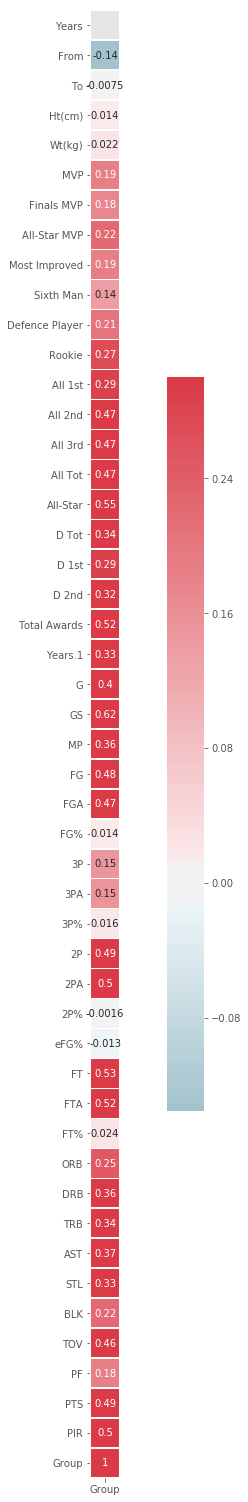

In [25]:
# Compute the correlation matrix
corr = careerTotalDB.corr()
corr = pd.DataFrame(corr['Group'])

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(17, 27))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

In [26]:
careerTotalDBWithScal.to_csv('Data/CSV Files/Database/careerAVGPlayerWithKMeans.csv', index = False)